In [1]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from tensorflow import keras
import tensorflow as tf
import pickle
import warnings

2023-05-30 17:44:50.300996: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
@keras.utils.register_keras_serializable()
def dice_coef(y_true, y_pred):
    y_true_f = keras.backend.flatten(keras.backend.cast(y_true, 'float64'))
    y_pred_f = keras.backend.flatten(keras.backend.cast(y_pred, 'float64'))
    intersection = keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection) / (keras.backend.sum(y_true_f + y_pred_f))

In [3]:
with open('AE_model_256_v2.pkl', 'rb') as f:
    AE_model = pickle.load(f)


2023-05-30 17:44:52.088252: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-30 17:44:52.095017: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-30 17:44:52.095226: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-30 17:44:52.096049: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-30 17:44:52.096276: I tensorflow/compile

In [11]:
x_new=[]

image = keras.preprocessing.image.load_img('./data/custom/cough_drop_white.jpg')
img = keras.preprocessing.image.img_to_array(image).astype('uint8')  # Convert to uint8
cv2.line(img,(99,211),(222,279),(0,0,0),39)
x_new.append(cv2.resize(img,(256,256)))

image = keras.preprocessing.image.load_img('./data/custom/card_white.jpg')
img = keras.preprocessing.image.img_to_array(image).astype('uint8')  # Convert to uint8
cv2.line(img,(176,220),(177,165),(0,0,0),71)
cv2.line(img,(151,149),(150,105),(0,0,0),18)
x_new.append(cv2.resize(img,(256,256)))

x_new = np.array(x_new)

In [9]:
x_new = []

image = keras.preprocessing.image.load_img('./data/custom/cough_drop.jpg', target_size=(256,256))
x_new.append(keras.preprocessing.image.img_to_array(image).astype('uint8'))  # Convert to uint8

image = keras.preprocessing.image.load_img('./data/custom/card.jpg', target_size=(256,256))
x_new.append(keras.preprocessing.image.img_to_array(image).astype('uint8'))  # Convert to uint8

x_new = np.array(x_new)
x_new.shape

(2, 256, 256, 3)

1/1 [==============================] - 0s 17ms/step


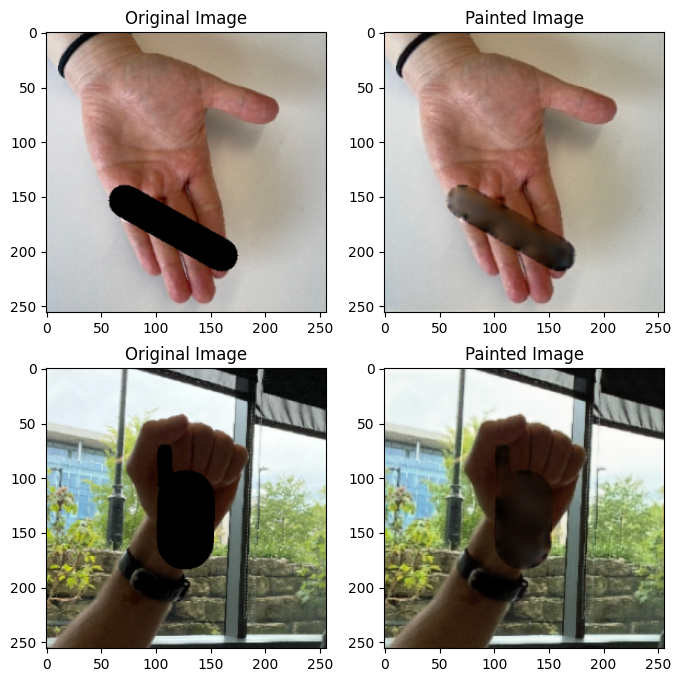

In [12]:
fig, axs = plt.subplots(nrows=x_new.shape[0], ncols=2, figsize=(8, 4*x_new.shape[0])) 

for i in range(x_new.shape[0]):
    inpaint = AE_model.predict((x_new[i]/255).reshape((1,) + (x_new[i]/255).shape))
    
    axs[i][0].imshow(x_new[i])
    axs[i][0].set_title('Original Image')
    
    axs[i][1].imshow(inpaint.reshape(inpaint.shape[1:]))
    axs[i][1].set_title('Painted Image')

plt.show()